In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from glob import glob
from astropy.timeseries import LombScargle
from scipy import stats
import warnings
from TESStools import *
import celerite
from celerite import terms
from scipy.optimize import minimize

In [2]:
tic = 404850274

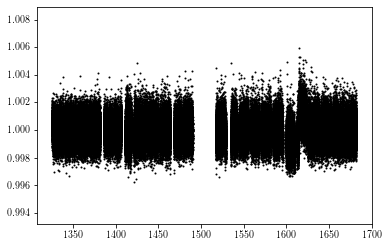

In [3]:
lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
plt.scatter(lc['Time'],lc['Flux'],s=1,c='k')

In [4]:
time, flux, err = lc['Time'], lc['Flux'], lc['Err']
ls = LombScargle(time,flux,dy=err)
freq,power=ls.autopower()

(0, 10)

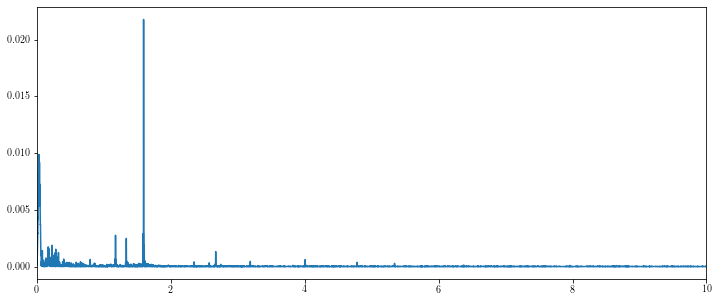

In [5]:
fig=plt.figure(figsize=(12,5))
plt.plot(freq,power)
plt.xlim(0,10)
#plt.ylim(0,0.005)

In [6]:
np.log2(0.15 * 2 * np.pi)

-0.08546946469388743

In [7]:
#Let's put our functions in a list that we can loop over
func_list = [phi_1,phi_2,phi_3]
f1 = phi_1 #we're also going to need this one explicitly later
#and finally a decay constant for the Gaussian envelope
c = 0.0125
y = flux.values
t = time.values
omega_start = -1 #log2(1/32)
omega_end = 5.5 #log2(16) 
omegas = np.logspace(omega_start,omega_end,1000,base=2)
taus = np.linspace(np.min(t),np.max(t),500)
wwz,wwa = MP_WWZ(func_list,f1,y,t,omegas,taus,c=c)

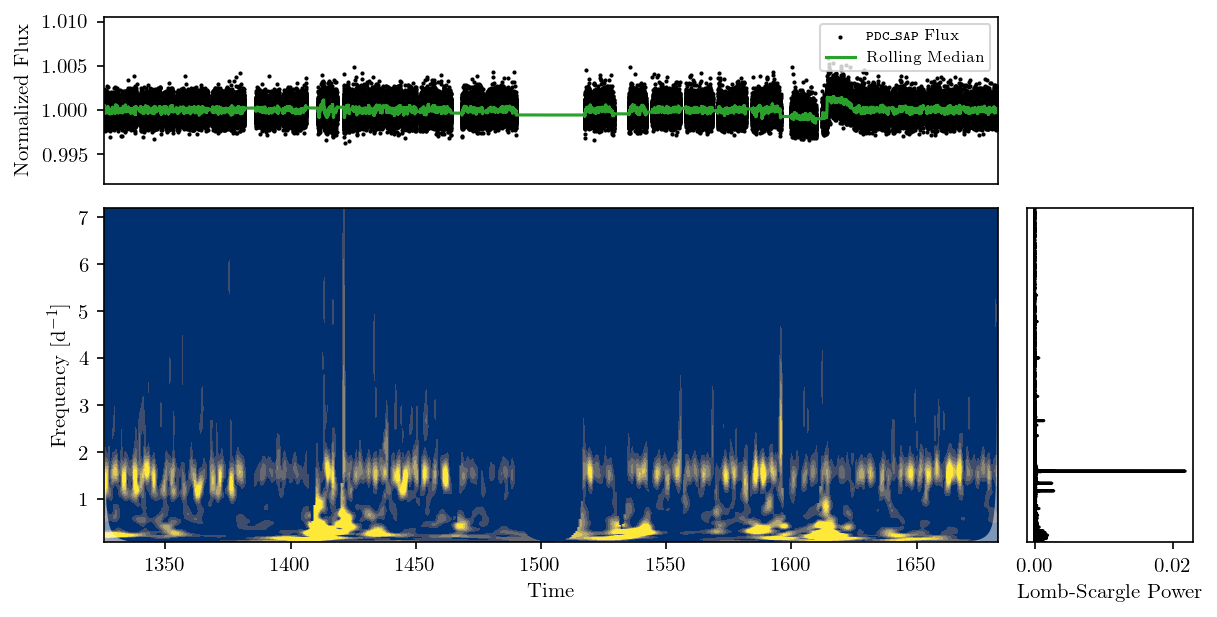

In [46]:
#A plot for TESS Cycle 3

fig = plt.figure(constrained_layout=True,figsize=(8,4),dpi=150)

gs = GridSpec(3, 4, figure=fig)
lcax = fig.add_subplot(gs[0, :3])
wwzax = fig.add_subplot(gs[1:,:3])
zsumax = fig.add_subplot(gs[1:,3])

lcax.scatter(time,flux,s=1,c='k',label=r'$\mathrm{\tt PDC\\\_SAP}$ Flux')
lcax.plot(lc_smooth['Time'],lc_smooth['Flux'],c='C2',label=r'Rolling Median')
lcax.set(ylabel='Normalized Flux',xlim=(np.min(time),np.max(time)),xticks=[])
h, l = lcax.get_legend_handles_labels()
lcax.legend(h[::-1],l[::-1],loc='upper right',fontsize='x-small')

wwzax.contourf(taus,omegas/2.0/np.pi,wwz,levels=100,cmap='cividis',vmax=50)
wwzax.fill_between(2*np.pi/omegas+np.min(t),0,omegas/2/np.pi,alpha=0.5,facecolor='white')
wwzax.fill_between(np.max(t)-2*np.pi/omegas,0,omegas/2/np.pi,alpha=0.5,facecolor='white')
wwzax.set(ylabel=r'Frequency [d$^{-1}$]',xlabel='Time',
          ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))

zsumax.plot(power,freq,c='k')
zsumax.set(yticks=[],xlabel=r'Lomb-Scargle Power',
           ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))

plt.savefig('../../Proposals/TESS_C3/ysg_wave.png')

In [ ]:
fs = []

(0, 7)

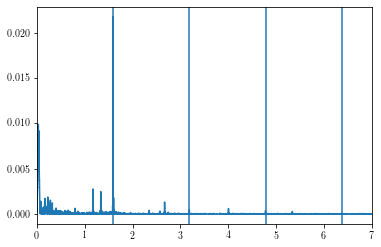

In [44]:
m = freq[freq < 1.5][np.argmax(power)]
plt.plot(freq,power)
for i in range(1,5):
    plt.axvline(x=i*m)
plt.xlim(0,7)

In [45]:
np.savetxt('/Users/carina/Desktop/p04.txt',np.array([time,flux]).T)

<bound method Axes.get_legend_handles_labels of <matplotlib.axes._subplots.AxesSubplot object at 0x1cb1b0d68>>

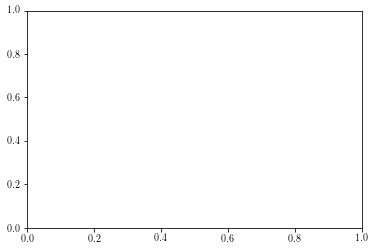

In [38]:
foo = plt.gca()
foo.get_legend_handles_labels

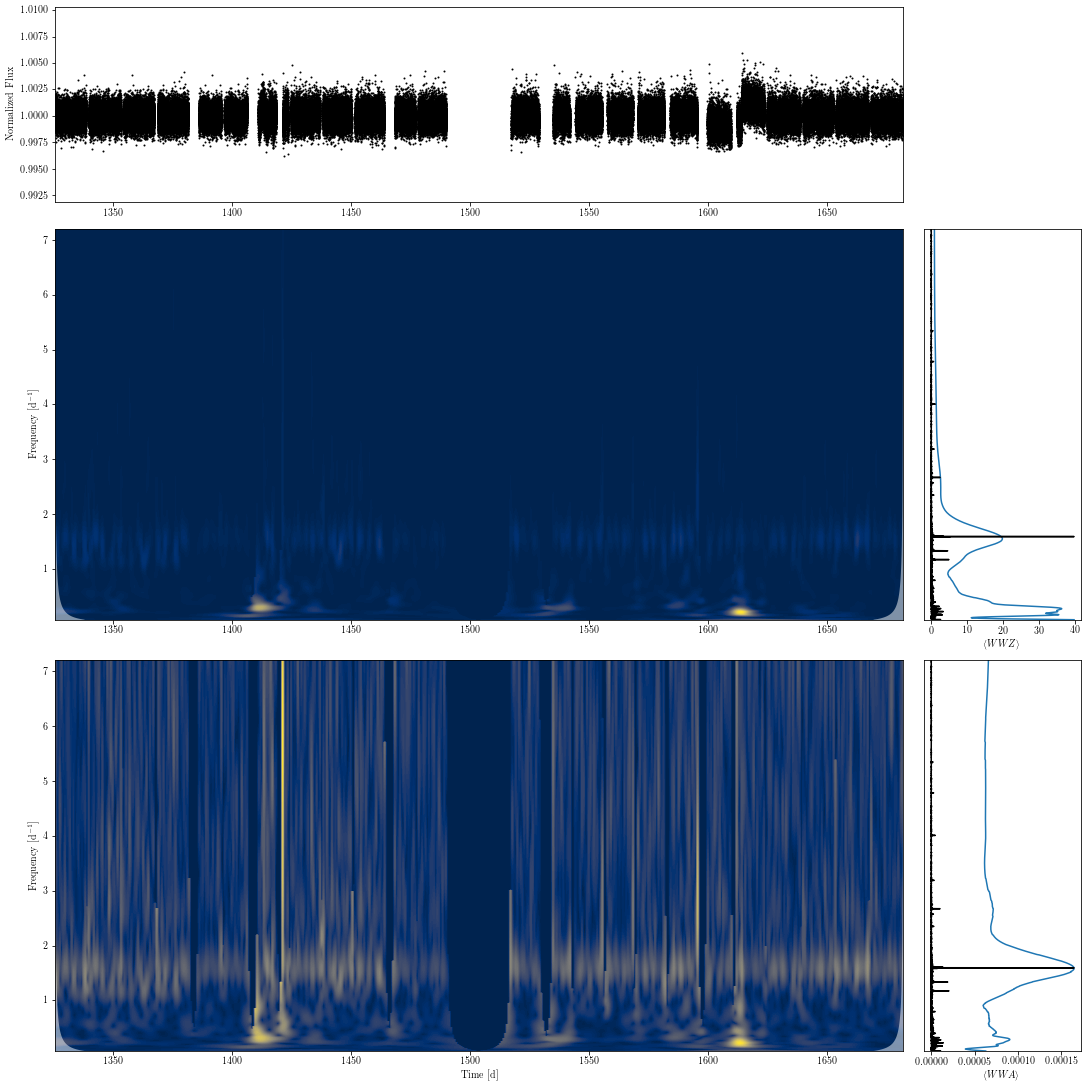

In [27]:
ls = LombScargle(t,y)
freq,power = ls.autopower()

fig = plt.figure(constrained_layout=True,figsize=(15,15))

gs = GridSpec(5, 4, figure=fig)
lcax = fig.add_subplot(gs[0, :3])
wwzax = fig.add_subplot(gs[1:3,:3])
wwaax = fig.add_subplot(gs[3:,:3])
zsumax = fig.add_subplot(gs[1:3,3])
asumax = fig.add_subplot(gs[3:,3])

lcax.scatter(time,flux,s=1,c='k')
lcax.set(ylabel='Normalized Flux',xlim=(np.min(time),np.max(time)))

wwzax.contourf(taus,omegas/2.0/np.pi,wwz,levels=100,cmap='cividis')
wwzax.fill_between(2*np.pi/omegas+np.min(t),0,omegas/2/np.pi,alpha=0.5,facecolor='white')
wwzax.fill_between(np.max(t)-2*np.pi/omegas,0,omegas/2/np.pi,alpha=0.5,facecolor='white')
wwzax.set(ylabel=r'Frequency [d$^{-1}$]',ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))

wwaax.contourf(taus,omegas/2.0/np.pi,wwa,levels=100,cmap='cividis')
wwaax.fill_between(2*np.pi/omegas+np.min(t),0,omegas/2/np.pi,alpha=0.5,facecolor='white')
wwaax.fill_between(np.max(t)-2*np.pi/omegas,0,omegas/2/np.pi,alpha=0.5,facecolor='white')
wwaax.set(xlabel='Time [d]',ylabel=r'Frequency [d$^{-1}$]',ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))

zsumax.plot(np.mean(wwz,axis=1),omegas/2.0/np.pi)
scale = np.max(np.mean(wwz,axis=1))/np.max(power)
zsumax.plot(power*scale,freq,c='k')
zsumax.set(yticks=[],xlabel=r'$\langle WWZ \rangle$',
           ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))

asumax.plot(np.mean(wwa,axis=1),omegas/2.0/np.pi)
asumax.set(yticks=[],xlabel=r'$\langle WWA \rangle$',
           ylim=(np.min(omegas)/2/np.pi,np.max(omegas/2/np.pi)))
scale = np.max(np.mean(wwa,axis=1))/np.max(power)
asumax.plot(power*scale,freq,c='k')

(1.1180570197059719e-06, 0.0005628635924715011)

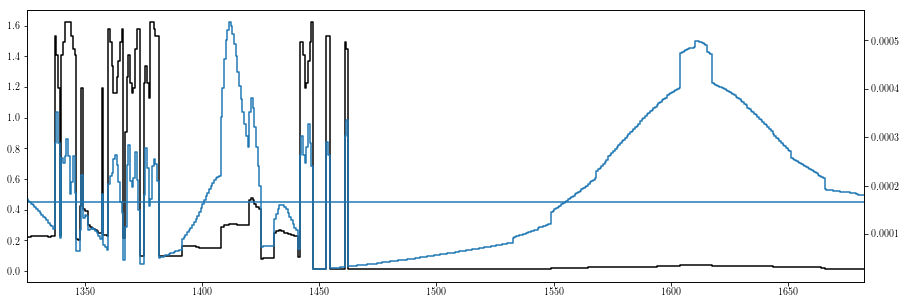

In [9]:
fig = plt.figure(figsize=(15,5))
plt.step(taus,np.array(max_peak_WWZ)/2.0/np.pi,c='k',where='mid')
plt.axhline(y=0.45)
ax = plt.gca().twinx()
ax.step(taus,max_peak_WWA,where='mid')
yl = ax.get_ylim()
plt.xlim(np.min(taus),np.max(taus))
plt.ylim(0,2.5)
ax.set_ylim(yl)

f_Ny = 323.89171072083246, f_R = 0.01778794028727421
10
Found 14 frequencies
14 unique frequencies


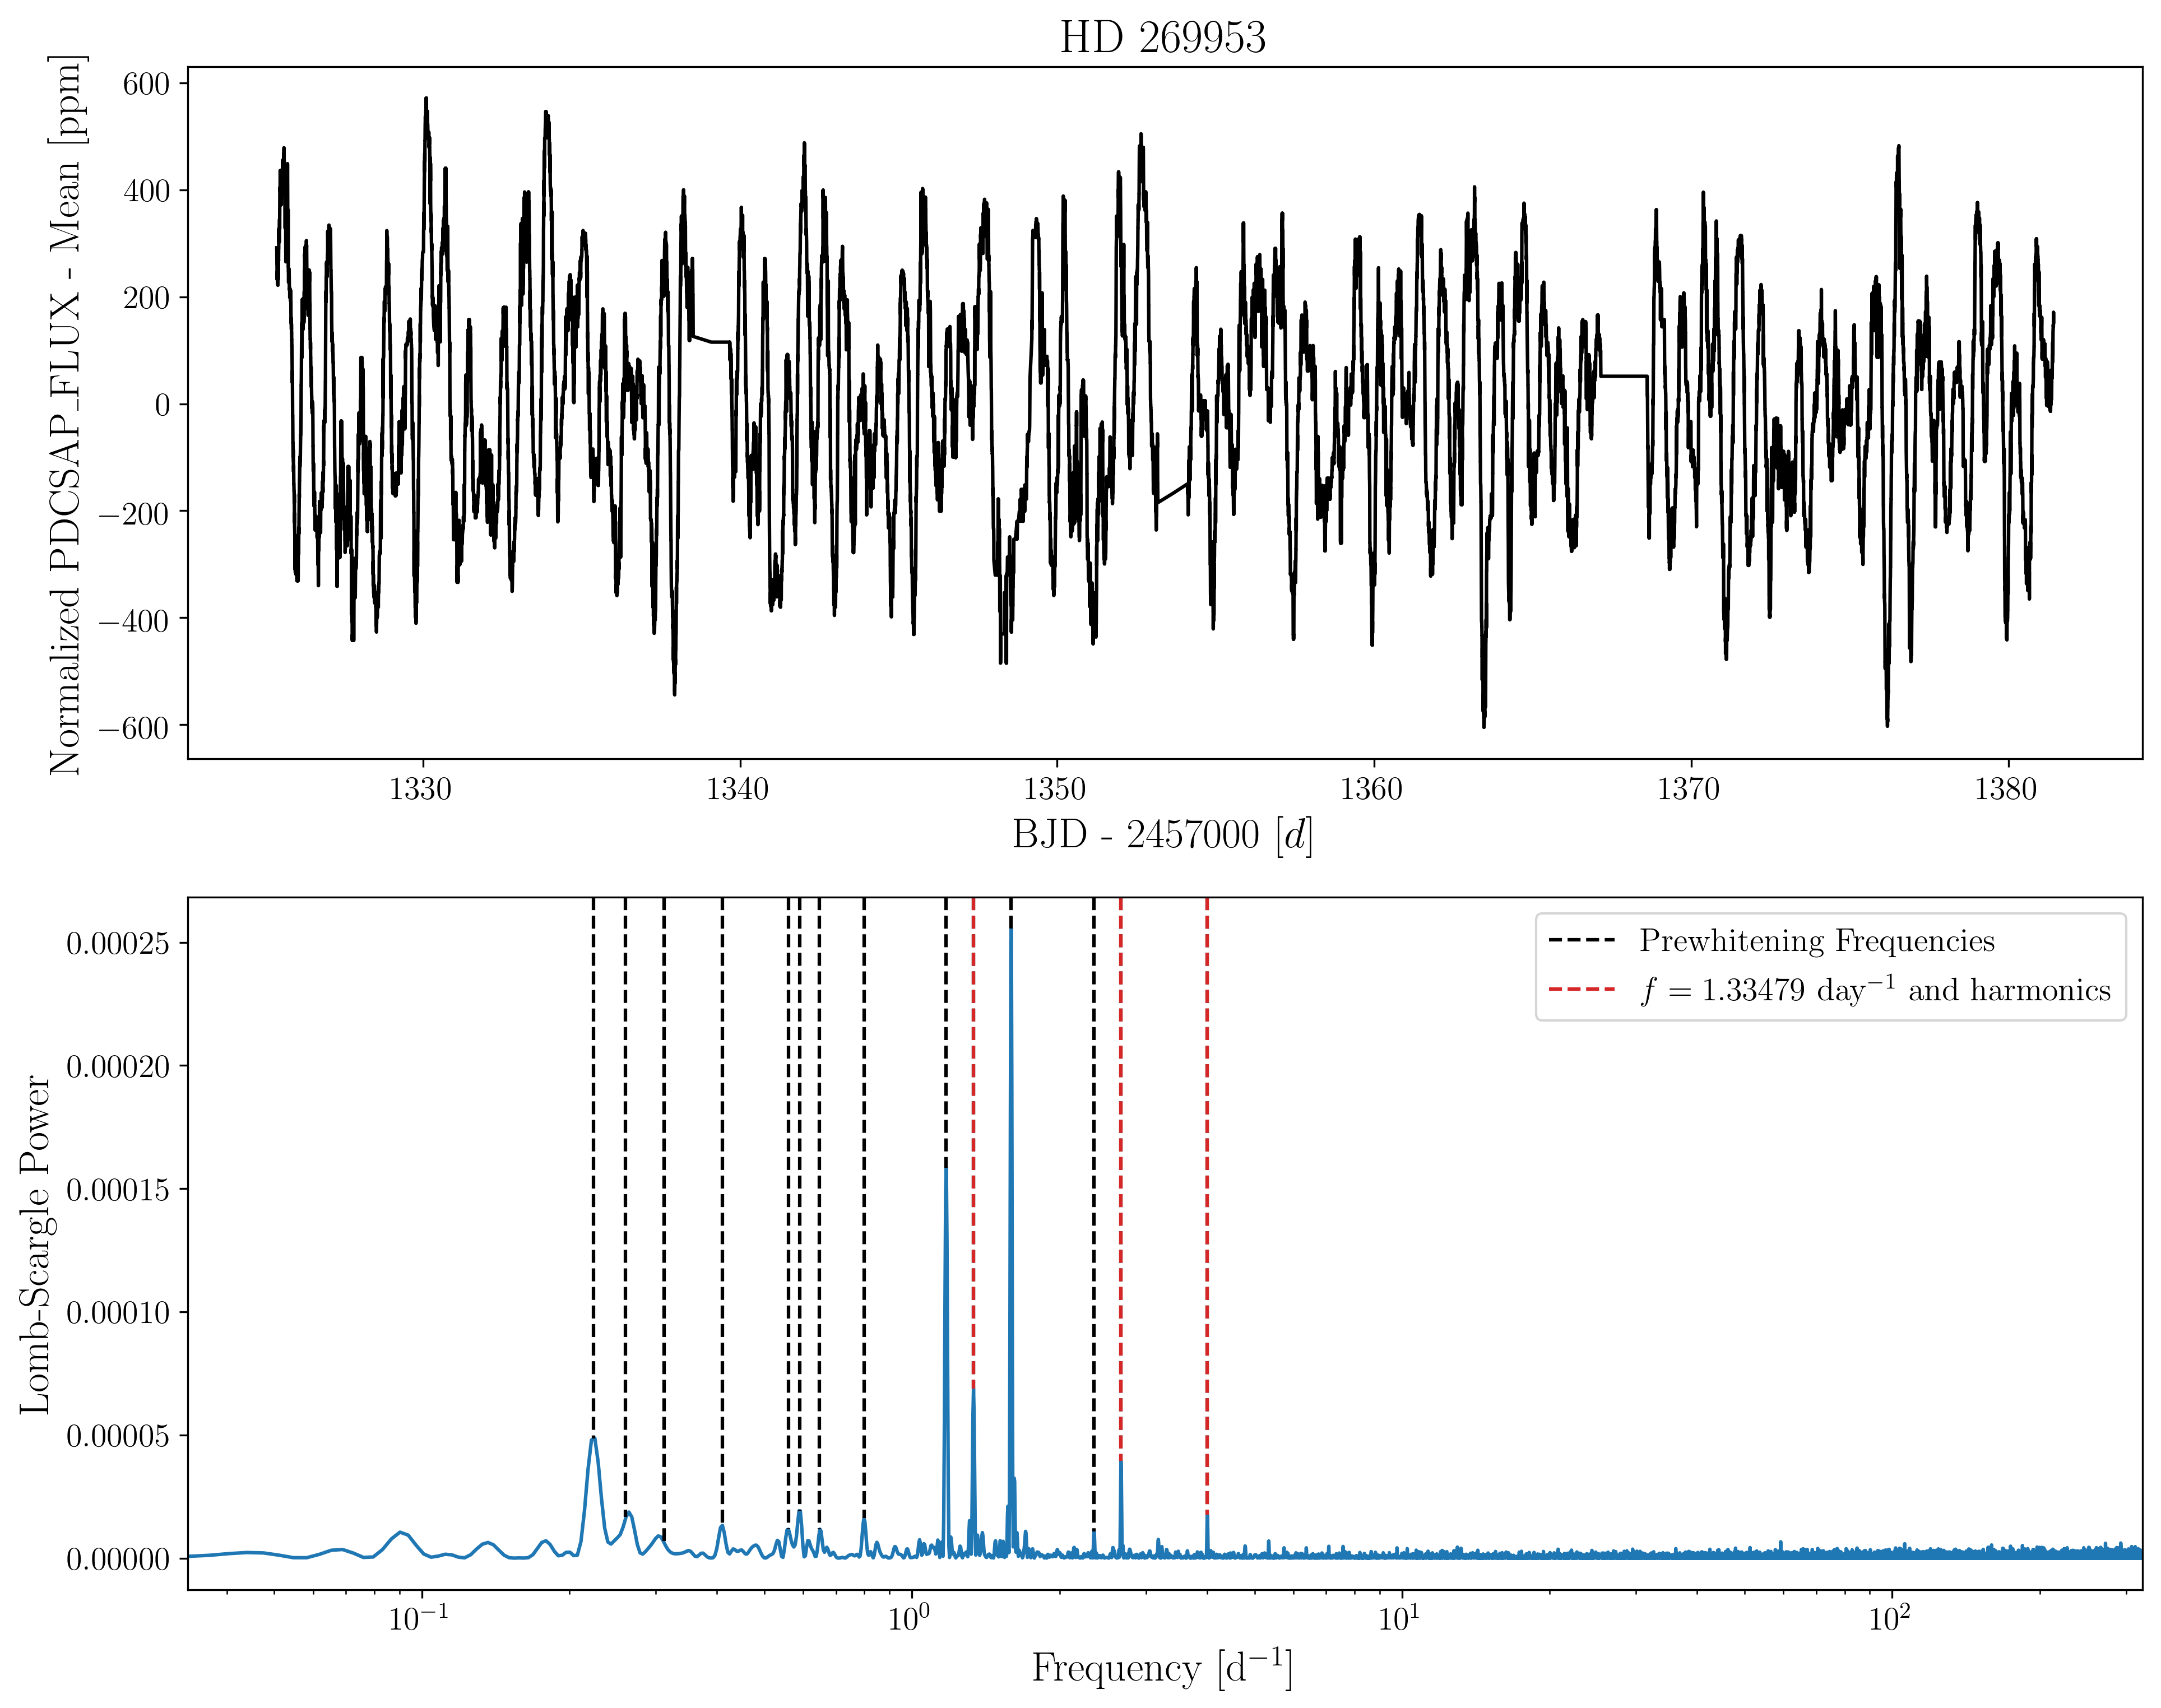

In [4]:
fig, ax = plt.subplots(2, figsize=(15,12),dpi=300)
lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
ax[0].plot(lc_smooth['Time'],1e6*(lc_smooth['Flux']-np.mean(lc_smooth['Flux'])),c='k')
ax[0].set(xlabel='BJD - 2457000 [$d$]', ylabel='Normalized PDCSAP\_FLUX - Mean [ppm]')


time, flux, err = lc['Time'], lc['Flux'], lc['Err']
pseudo_NF = 0.5 / (np.mean(np.diff(time)))
ls = LombScargle(time, flux, normalization='psd')
freq, power = ls.autopower(minimum_frequency=1.0/30.0,
                    maximum_frequency=pseudo_NF) 

good_fs, good_amps, good_phases = prewhiten(time, flux, err)

harmonics = harmonic_search(good_fs)

ax[1].plot(freq, power)

ax[1].set(xlabel='Frequency [d$^{-1}$]', ylabel='Lomb-Scargle Power', xscale='log', xlim=(1/30,pseudo_NF))

ylim = ax[1].get_ylim()

plt.plot([good_fs[0,0],good_fs[0,0]],[ylim[1],power[np.argmin(np.abs(freq-good_fs[0,0]))]],c='k',ls='--',label='Prewhitening Frequencies')
for f in good_fs[1:,0]:
    plt.plot([f,f],[ylim[1],power[np.argmin(np.abs(freq-f))]],c='k',ls='--')

fundamental = harmonics[0,0]
harmonic = harmonics[1,:2]
plt.plot([fundamental,fundamental],[ylim[1],power[np.argmin(np.abs(freq-1.33479))]],c='C3',ls='--',label='$f=1.33479$ day$^{-1}$ and harmonics')
for h in harmonic:
    plt.plot([h,h],[ylim[1],power[np.argmin(np.abs(freq-h))]],c='C3',ls='--')

ax[1].set(ylim=ylim)
ax[1].legend(fontsize=14)
    
for a in ax:
    a.xaxis.label.set_size(18)
    a.yaxis.label.set_size(18)
    for tick in a.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in a.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
        
ax[0].set_title('HD 269953',fontsize=20)
plt.savefig('../plots/HD269953_lcperiod.pdf')

/Volumes/shoobert/Research/UW/TESS/code/TESStools.py:111: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(lc['Time'].values,lc['Flux'].values,deg=deg)


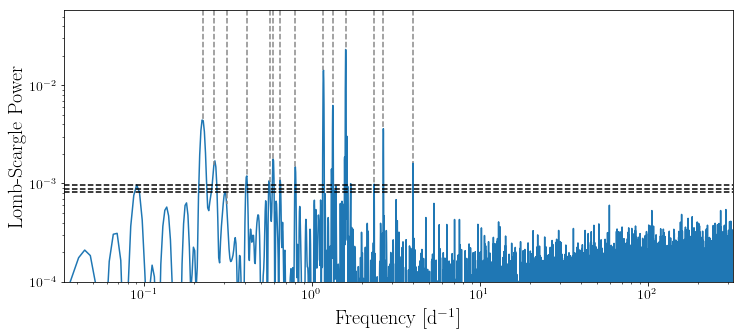

In [9]:
fig = plt.figure(figsize=(12,5))
lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
lc = polynorm(lc, deg=7)[0]
time, flux, err = lc['Time'], lc['Flux'], lc['Err']
ls = LombScargle(time, flux)
freq, power = ls.autopower() 
plt.loglog(freq, power)

ax = plt.gca()

ax.set(xlabel='Frequency [d$^{-1}$]',ylabel='Lomb-Scargle Power', xlim=(1/30,pseudo_NF))

ylim = ax.get_ylim()

plt.plot([good_fs[0,0],good_fs[0,0]],[ylim[1],power[np.argmin(np.abs(freq-good_fs[0,0]))]],c='#888888',ls='--',label='Prewhitening Frequencies')
for f in good_fs[1:,0]:
    plt.plot([f,f],[ylim[1],power[np.argmin(np.abs(freq-f))]],c='#888888',ls='--')
   
ax.set(ylim=(1e-4,ylim[1]))

probabilities = [0.1, 0.05, 0.01]
fal = ls.false_alarm_level(probabilities)
for f in fal:
    plt.axhline(y=f,c='k',ls='--')
        
#plt.legend(loc=1, framealpha=0.9, prop={'size': 14})

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [8]:
harmonics

array([[1.33479243, 1.33479243, 0.26019548],
       [2.67017901, 4.00557547, 2.35305773],
       [2.        , 3.        , 9.        ]])